# Twitter Sentiment on Climate Change

## The problem at hand...

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.


Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

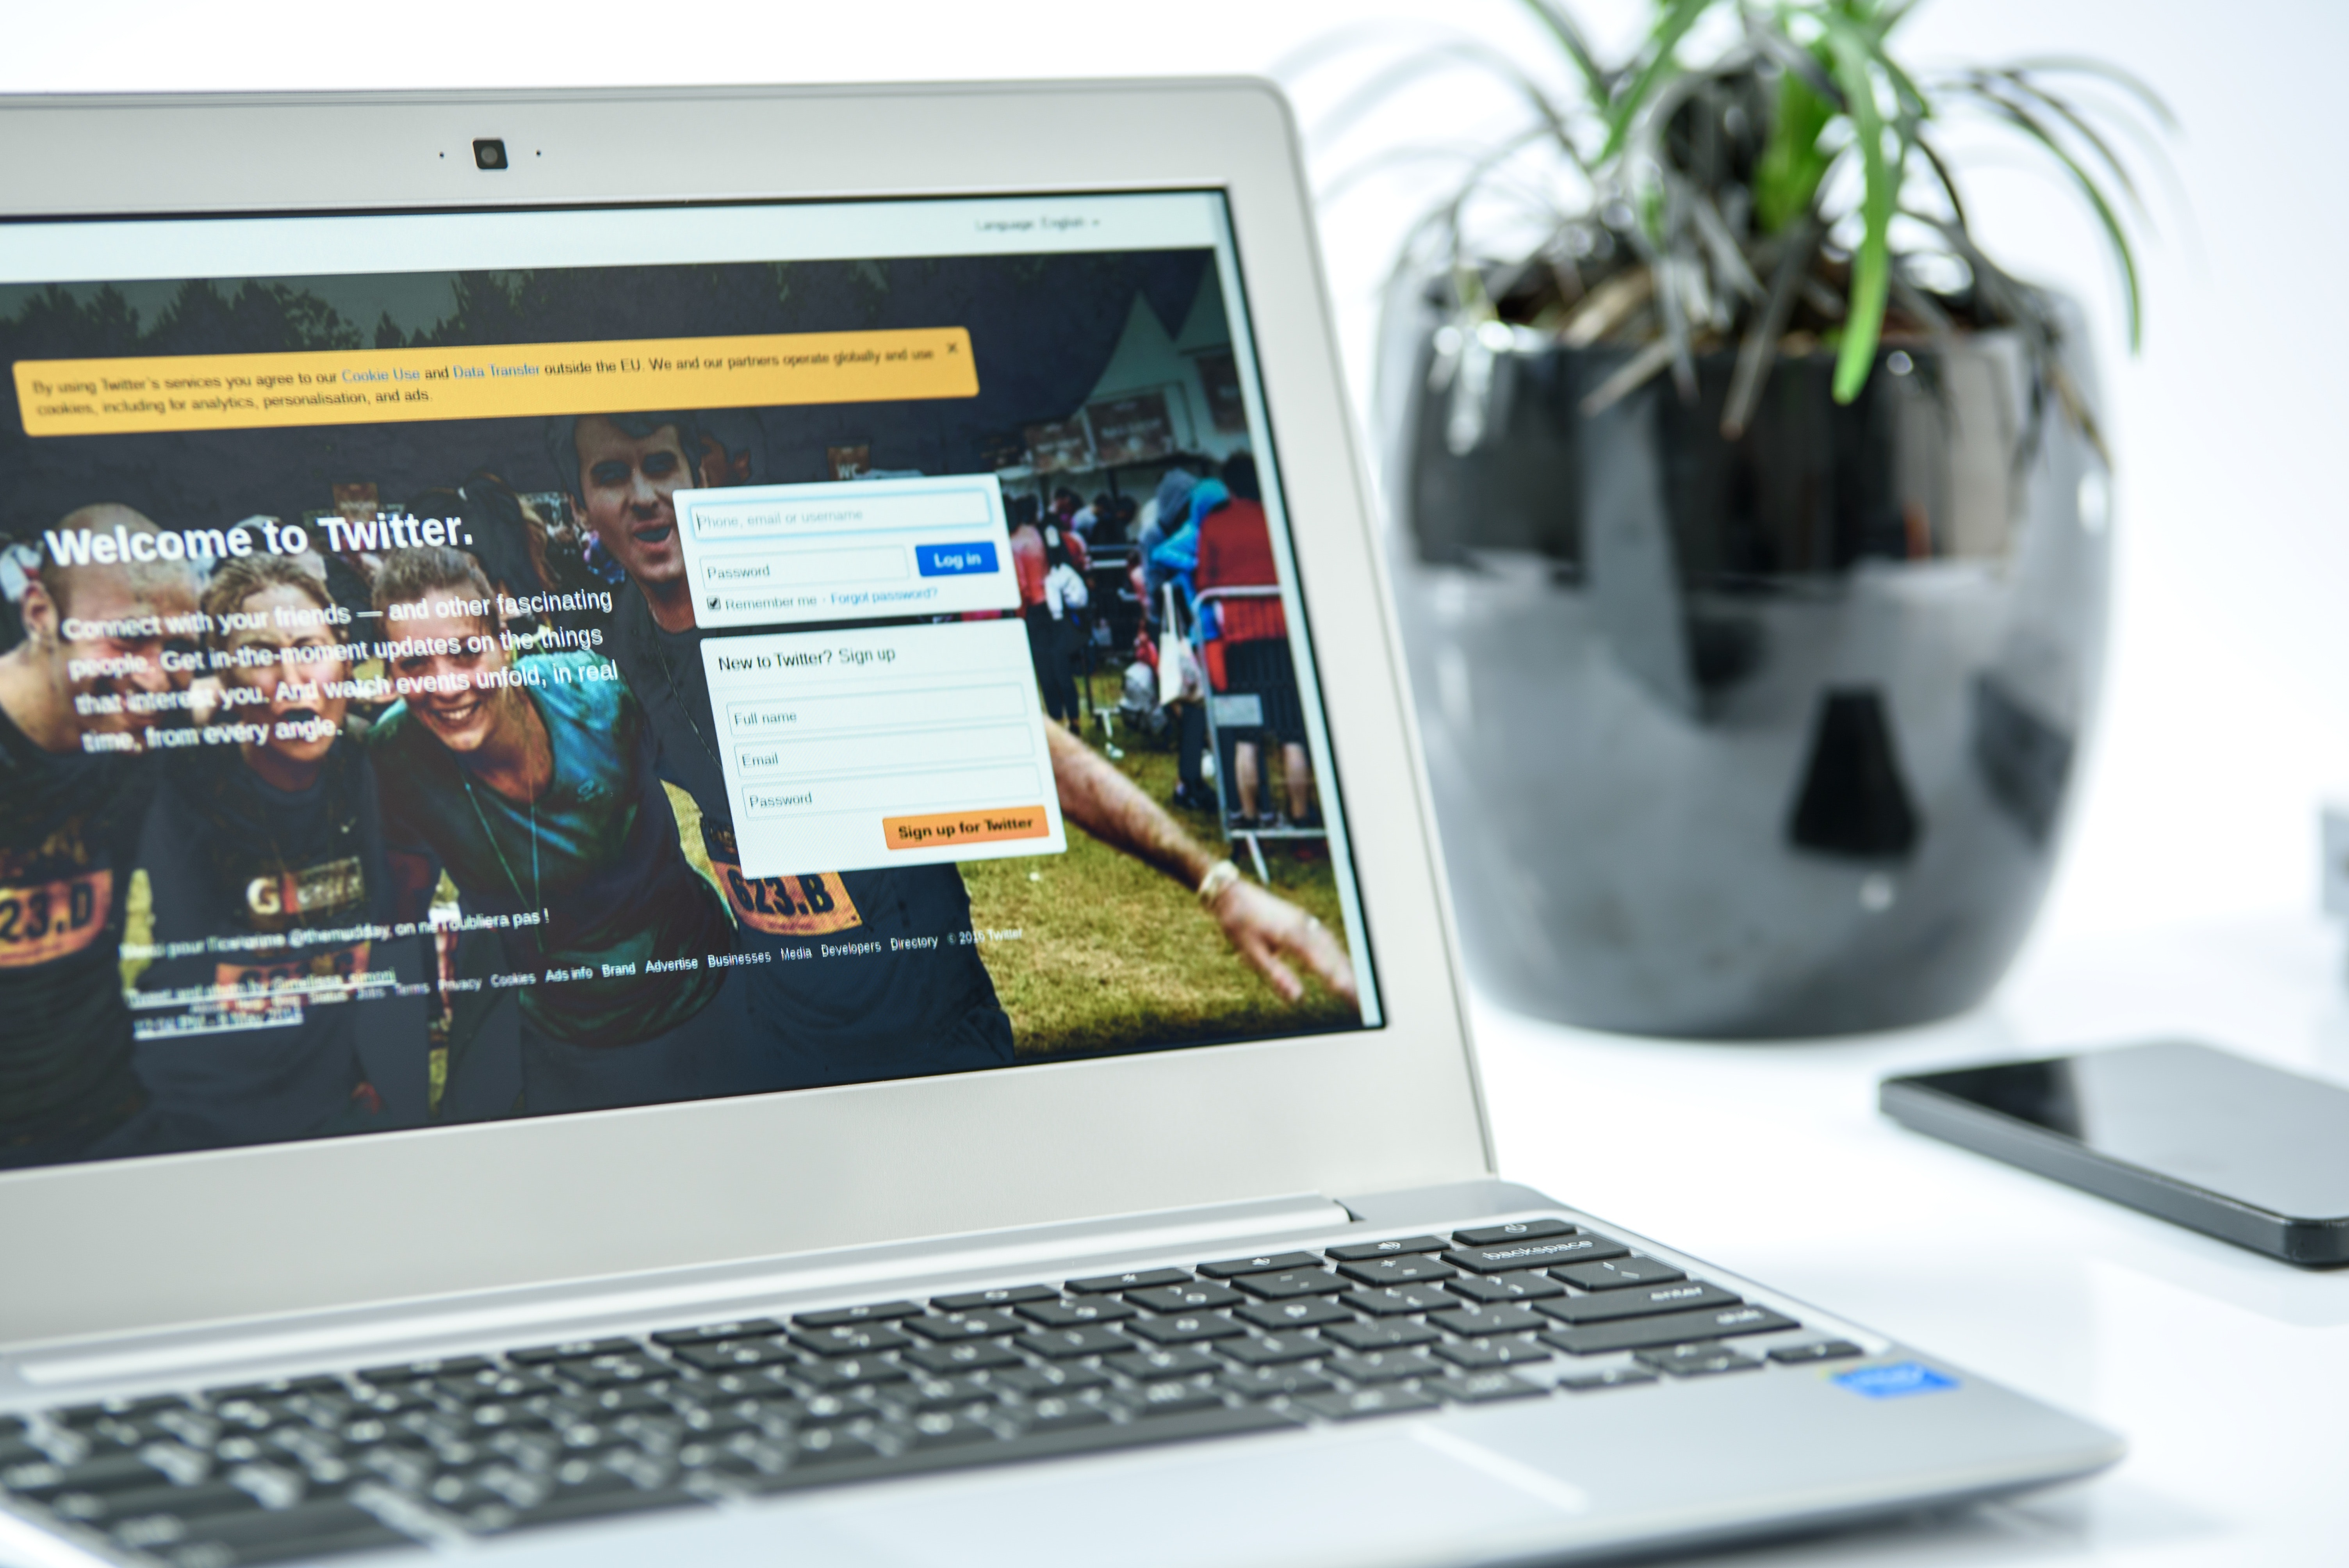

*Image: pexels.com*

## So how are we doing this again?
### Importance of NLP

Social media sentiment analysis applies natural language processing (NLP) to analyse online mentions and determine the feelings behind the post. Social sentiment analysis will tell you whether the post was positive, negative, or neutral.



If you want to know exactly how people feel about a topic, sentiment analysis can do the trick. Specifically, social media sentiment analysis takes the conversations your customers are around the social space and puts them into context.

Think of sentiment analysis as a subset of social listening. Using this tool organisations can monitor thoughts and emotions around a topic as sentiment analysis digs into the positive, negative and neutral emotions surrounding those mentions.

To read more about sentiment analysis here is a very good article : https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17


# Table of contents:

- [Import libraries](#section-one)
- [Importing data](#section-two)
- [Exploratory data analysis](#section-three)
- [Data Engineering](#section-four)

<img src="https://i.gifer.com/CBRR.gif" >

<a id="section-one"></a>
## Importing libraries

In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import advertools as adv
import nltk
from nltk.corpus import stopwords
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

<a id="section-two"></a>
## Importing data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

<a id="section-three"></a>
## Exploratory Data Analysis 


Firstly, we'll take a look at what our dataframes look like and get some first glances at the data




In [3]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


Observations:
- We have 3 columns and 15819 rows in the training dataframe. 
- The most important columns being the 'sentiment' and 'message' columns.
- The sentiment columns seem to have numbers assigned for each sentiment.
- The impression this give is that a '1' denotes a positive sentiment, '0' a neutral one, and '-1' a negative one. 
- It is difficult for now to tell or even assume what the '2' stands for.
- We shall put the assumptions about the nature of the sentiments reperesented by the numbers to the test later in the notebook



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Observations:
- The training data has no missing values

In [148]:
train.shape

(15819, 3)

Observations:
- We have 3 columns and 15819 rows in the training dataframe.

In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Observations:
- The test data has no missing values

In [150]:
test.shape

(10546, 2)

Observations:
- We have 2 columns and 10546 rows in the training dataframe.

In [151]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Observations:
- We have the mean of sentiment values very close to '1' so we can expect a lot of sentiment of value '1' in the data.

<AxesSubplot:xlabel='sentiment', ylabel='count'>

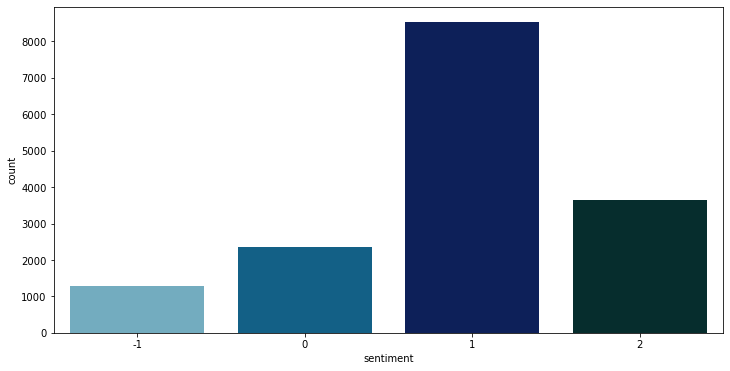

In [152]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=train, palette ='ocean_r')

Observation:
- As per our assumption after observing the mean, the most value counts belong to the sentiment value '1'

#### To continue our data exploration we'll need to manipulate the dataframe and its contents so we'll make a copy(called df) of it and use the copy henceforth.

In [6]:
df = train.copy()

In [7]:
df.head(20)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [8]:
'Here we want to know how many words belong to each tweet. We may or may not find interesting observations'

df['word_count'] = df['message'].apply(lambda x:len(str(x).split())) #Number Of words in main text

In [9]:
df.head()

,sentiment,message,tweetid,word_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18


<AxesSubplot:xlabel='word_count', ylabel='count'>

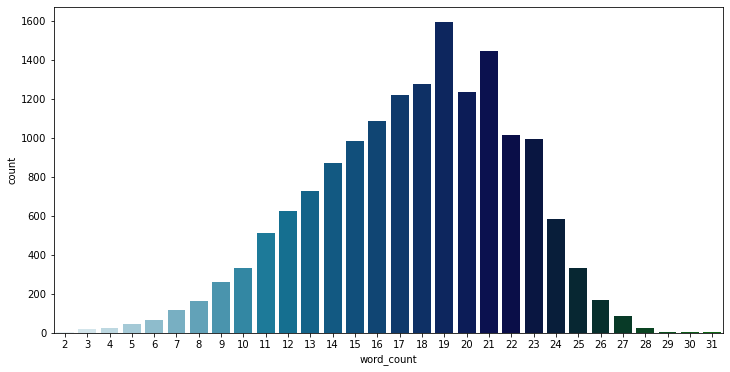

In [10]:
'Plotting distribution of number of words in these climate change tweets'

plt.figure(figsize=(12,6))
sns.countplot(x='word_count',data=df, palette ='ocean_r')

In [11]:
"""Earlier we assumed that a sentiment of '-1' was a negative tweet
(i.e these do not believe that climate change is fuelled largely by us humans).
We'll now take a closer look at these tweets and confirm if this is indeed the case """

neg = df[df['sentiment'] == -1]
neg.head(10)

,sentiment,message,tweetid,word_count
28,-1,Sally Kohn’s latest evidence of climate change...,355491,21
46,-1,@realDonaldTrump Carbon Tax is a Globalist ide...,61141,21
48,-1,RT @SteveSGoddard: We had winds close to 100 M...,719523,24
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385,14
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263,21
107,-1,RT @Fruitloopian: Why is there snow in March i...,798585,13
113,-1,can someone pls explain to me why it's -37 in ...,337974,14
116,-1,Explain that my global warming advocates. http...,472265,7
121,-1,@TomiLahren kinda funny the professors talk sh...,740194,19
129,-1,RT @signordal: New global warming study is ter...,473664,18


Observations:
- The tweets make use of language that strongly suggests that the users do not believe climate change is due to human activity
- We can conclude that our assumptions were correct

In [12]:
"""Earlier we assumed that a sentiment of '0' was a neutral tweet
(i.e these tweets do not make it obvious whether the user believes that climate change is fuelled largely by us humans).
We'll now take a closer look at these tweets and confirm if this is indeed the case """

neutral = df[df['sentiment'] == 0]
neutral.head(10)

,sentiment,message,tweetid,word_count
19,0,Calum: *tweets abt reunitingish w the cast*\n-...,547924,23
22,0,"we also met this guy, he let us in on some tru...",67545,21
30,0,@Jnp_Ftw are these the same scientists that de...,365051,14
39,0,We’ ve dealt with simple issues like climate c...,403368,20
43,0,RT @andrewsharp: Win probability is bullshit m...,326916,21
52,0,Chris: Who is it then that initially talked ab...,352623,22
53,0,Do you approve of the executive order @realDon...,785637,19
58,0,@GlennF They are calling to the great Space Cy...,113396,15
64,0,RT @fuckofflaine: @jJxrry @SpaceX @QuebanJesus...,645201,22
67,0,RT @Hope012015: China tells Trump that climate...,687045,20


In [13]:
"""Earlier we assumed that a sentiment of '1' was a positive tweet
(i.e these tweets indicate that the users do indeed believe that climate change is fuelled largely by us humans).
We'll now take a closer look at these tweets and confirm if this is indeed the case """

pos = df[df['sentiment'] == 1]
pos.head(10)

,sentiment,message,tweetid,word_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18
5,1,Worth a read whether you do or don't believe i...,425577,14
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,16
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,23
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,25
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,15
10,1,RT @StephenSchlegel: she's thinking about how ...,295793,19


In [14]:
"""
Earlier we observed there were tweets of sentiment '2'. These tweets were largely preceded by handles of large news corporations.
We want to group these together and see if we can confidently say these are news tweets
"""

two = df[df['sentiment'] == 2]
two.head(10)

,sentiment,message,tweetid,word_count
2,2,RT @RawStory: Researchers say we have three ye...,698562,19
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673,19
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092,14
26,2,Bangladesh confronting climate change head on ...,365291,8
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471,18
36,2,RT @Independent: Trump's team removed climate ...,526603,19
41,2,2050 climate targets: nations are playing the ...,8984,16
44,2,RT @washingtonpost: The Alaskan tundra is fill...,905639,16
45,2,RT @TheTorontoSun: From @sunlorrie: Indian env...,741568,16
49,2,RT @Starbuck: World food supplies at risk as #...,499888,17


Observations:
- The tweets have numerous world-renowned news outlets associated with them by way of retweets.
- The language used is mainly formal and very 'headline-like'.
- We can conclude that our assumptions were correct and these are indeed tweets from news outlets.

## Finding Hashtags

We're firstly going to extract some hashtags from the tweets. These may be useful to us later in the project

In [19]:
"""
In our advertools library, we can extract a number of different entities within a tweet.
We'll start with hashtags but the code here illustrates what else we can extract from tweets
"""
[x for x in dir(adv) if x.startswith('extract')]  # currently available extract functions

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_numbers',
 'extract_questions',
 'extract_urls',
 'extract_words']

In [16]:
hashtag_summary = adv.extract_hashtags(df['message'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [17]:
hashtag_summary['overview']

{'num_posts': 15819,
 'num_hashtags': 4139,
 'hashtags_per_post': 0.2616473860547443,
 'unique_hashtags': 1783}

In [21]:
"""
Hashtags as they appear per tweet. If there is a blank space, that tweet did not have a hashtag
"""
hashtag_summary['hashtags'][:10]

[[], [], [], ['#todayinmaker'], ['#electionnight'], [], [], [], [], []]

In [22]:
"""
Number of hashtags per tweet
"""
hashtag_summary['hashtag_counts'][:20]

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [20]:
"""
Aggregated hashtags. Viewing the first 10 that appear in the dataset
"""
hashtag_summary['hashtags_flat'][:10]

['#todayinmaker',
 '#electionnight',
 '#climatemarch',
 '#saveourplanet',
 '#cop22',
 '#earthtomarrakech',
 '#climateã',
 '#obamaunc',
 '#cdnpoli',
 '#johnholdren']

In [24]:
"""
Here we are looking at number of hashtags per tweet. In other words, how many tweets had no hashtags, one hashtag and so one
"""
hashtag_summary['hashtag_freq'][:15]

[(0, 12959),
 (1, 1990),
 (2, 605),
 (3, 182),
 (4, 48),
 (5, 21),
 (6, 6),
 (7, 5),
 (8, 2),
 (9, 1)]

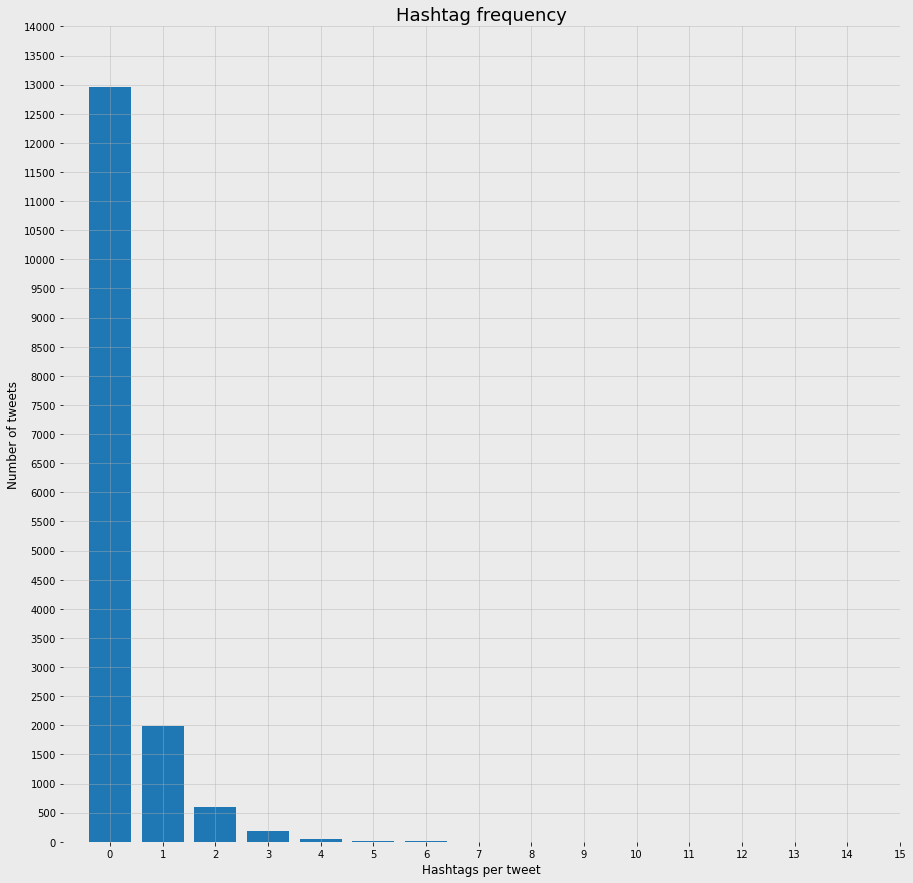

In [53]:
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 14500, 500))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [30]:
"""
Hashtags that are showing up the most
"""

hashtag_summary['top_hashtags'][:10]

[('#climate', 352),
 ('#climatechange', 208),
 ('#beforetheflood', 157),
 ('#trump', 88),
 ('#cop22', 77),
 ('#environment', 76),
 ('#parisagreement', 67),
 ('#imvotingbecause', 62),
 ('#globalwarming', 50),
 ('#actonclimate', 49)]

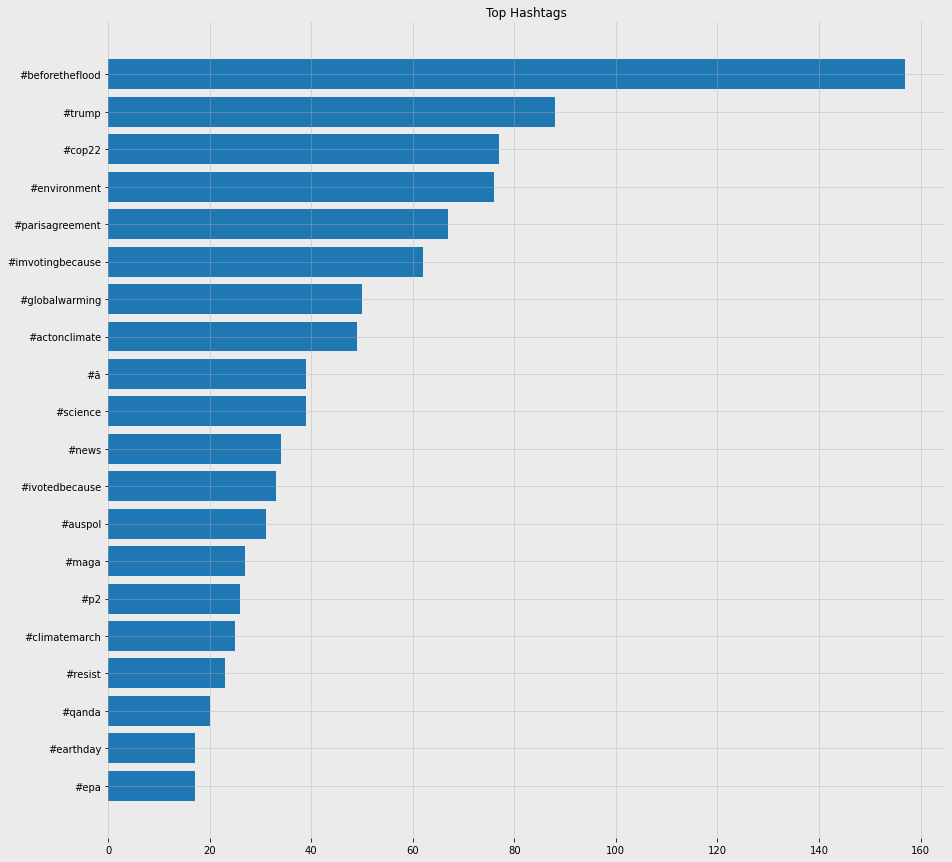

In [52]:
"""
Visualising the top hashtags
"""
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:20]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:20]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

## Mentions
### Who is being talked to or talked about 

In [34]:
mention_summary = adv.extract_mentions(df['message'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [35]:
mention_summary['overview']

{'num_posts': 15819,
 'num_mentions': 14742,
 'mentions_per_post': 0.9319173146216575,
 'unique_mentions': 7517}

In [37]:
"""
Most accounts mentioned
"""

mention_summary['mentions_flat'][:10]

['@mashable',
 '@rawstory',
 '@soynoviodetodas',
 '@thenation',
 '@makeandmendlife',
 '@aceofspadeshq',
 '@paigetweedy',
 '@stephenschlegel',
 '@goodenergy',
 '@tveitdal']

In [39]:
"""
Number of tweets with no mentions, one mention, two mentions and so on
"""

mention_summary['mention_freq'][:15]

[(0, 4014), (1, 9580), (2, 1707), (3, 387), (4, 89), (5, 27), (6, 9), (7, 6)]

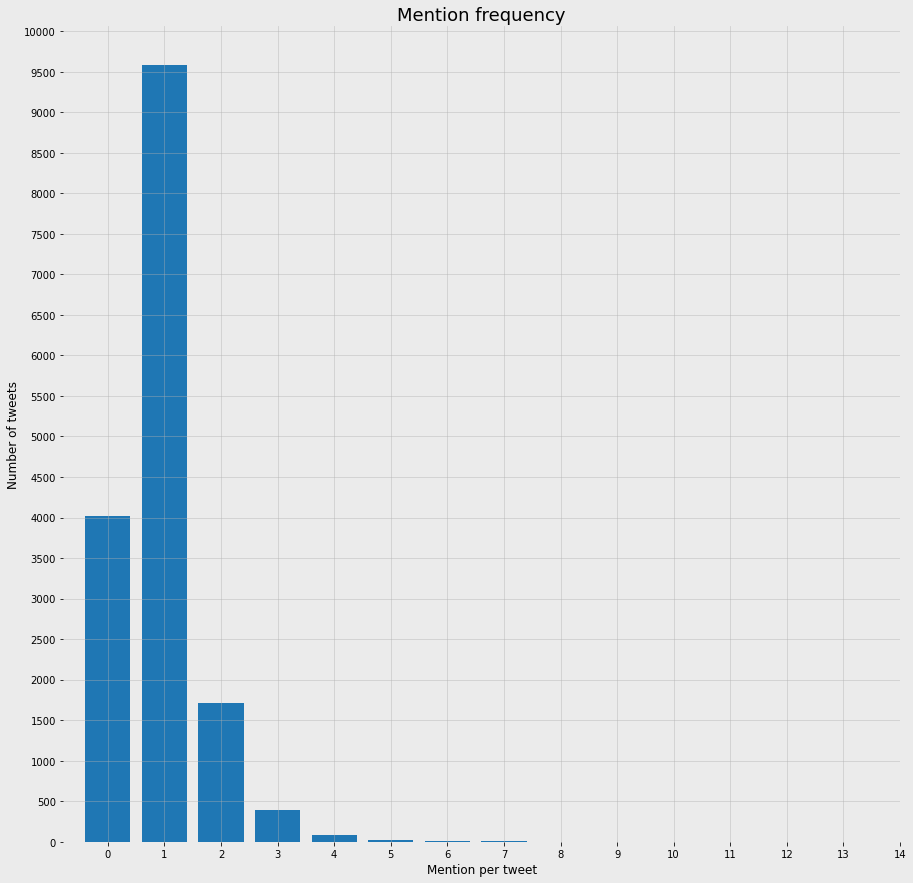

In [51]:
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 10500, 500))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [44]:
"""
Most mentioned accounts
"""
mention_summary['top_mentions'][:10]

[('@stephenschlegel', 307),
 ('@realdonaldtrump', 283),
 ('@sensanders', 254),
 ('@leodicaprio', 139),
 ('@berniesanders', 130),
 ('@natgeochannel', 124),
 ('@cnn', 122),
 ('@nytimes', 101),
 ('@thehill', 91),
 ('@washingtonpost', 77)]

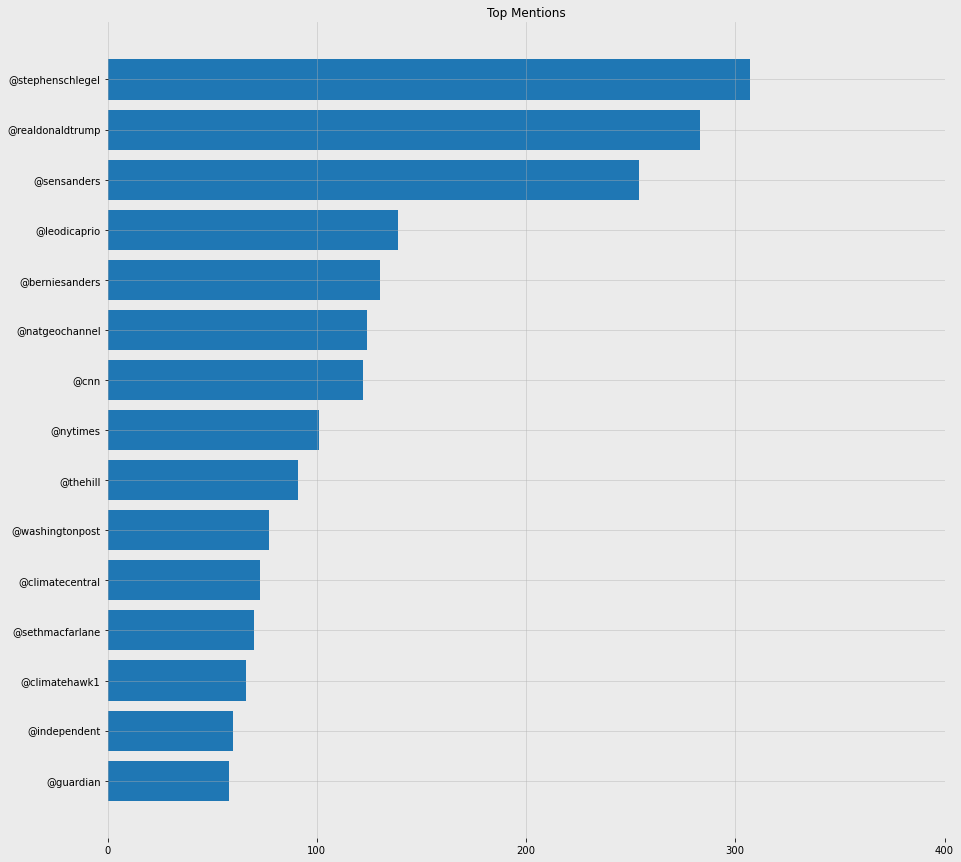

In [50]:
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 450, 100))
plt.gca().set_frame_on(False)

## Questions
### What are people asking around the topic?

In [55]:
question_summary = adv.extract_questions(df['message'])

In [56]:
question_summary['overview']


{'num_posts': 15819,
 'num_question_marks': 1860,
 'question_marks_per_post': 0.11758012516593969,
 'unique_question_marks': 2}

In [57]:
question_summary['question_mark_freq']

[(0, 14316),
 (1, 1264),
 (2, 168),
 (3, 45),
 (4, 16),
 (5, 4),
 (6, 4),
 (8, 1),
 (9, 1)]

In [59]:
"""
Different languages use different symbols for question marks. In our data we found just one variation of the standard English one
"""
question_summary['top_question_marks']

[('?', 1858), ('¿', 2)]

In [61]:
"""
List of 15 of questions asked
"""

[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[(29, ['Why?']),
 (30,
  ['@Jnp_Ftw are these the same scientists that denounce climate change?']),
 (47,
  ['Will anyone who supports Trumps view of climate change (non polluter cronie) please step forward?']),
 (52, ['Chris: Who is it then that initially talked about climate change?']),
 (53,
  ['Do you approve of the executive order @realDonaldTrump is due to sign re climate change and the environment?']),
 (71, ["If global warming doesn't exist, why is club penguin shutting down?"]),
 (74, ['RT @Cernovich: Is climate change real?']),
 (90, ['conservatives just love denying science huh?']),
 (102,
  ['RT @thinkprogress: Where are Rex Tillerson’s climate change emails?']),
 (107,
  ['RT @Fruitloopian: Why is there snow in March if we have global warming?']),
 (109,
  ['RT @SethMacFarlane: Are we looking at an America that officially believes climate change is a hoax?']),
 (113,
  ["can someone pls explain to me why it's -37 in march,,,, global warming who??"]),
 (119,
  ['RT @drishti

## Intense Words
### Climate change can illicit quite strong emotions and moreso on social media. In this subsection we shall mine for intensity. Intensity in this notebook is described as words that have three or more characters repeated, showing an intense feeling/opinion. Note that intense could be positive or negative.

In [62]:
intense_summary = adv.extract_intense_words(df['message'], min_reps=3)

In [63]:
intense_summary['overview']

{'num_posts': 15819,
 'num_intense_words': 1253,
 'intense_words_per_post': 0.0792085466843669,
 'unique_intense_words': 880}

In [64]:
intense_summary['top_intense_words'][:20]

[('...', 65),
 ('change...', 35),
 ('warming...', 26),
 ('great...', 21),
 ("'Hello...", 20),
 ('����', 19),
 ('������', 11),
 ('and...', 11),
 ('change....', 10),
 ('the...', 8),
 ('��������', 7),
 ('is...', 7),
 ('VOTE!!!!', 6),
 ('now...', 5),
 ('real...', 5),
 ('change???', 5),
 ('@UNFCCC', 5),
 ('800,000', 5),
 ('KKK', 5),
 ('asked...', 5)]

## Emojis
### When words fail, people may turn to emojis to express their feelings or even to add more emphasis on text in a tweet. In this subsection, we'll look at emojis that occurred the most in our data

In [65]:
emoji_summary = adv.extract_emoji(df['message'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [66]:
emoji_summary['overview']

{'num_posts': 15819,
 'num_emoji': 289,
 'emoji_per_post': 0.01826916998546052,
 'unique_emoji': 122}

In [67]:
emoji_summary['emoji_freq'][:15]

[(0, 15637),
 (1, 132),
 (2, 26),
 (3, 11),
 (4, 5),
 (5, 4),
 (6, 2),
 (7, 1),
 (13, 1)]

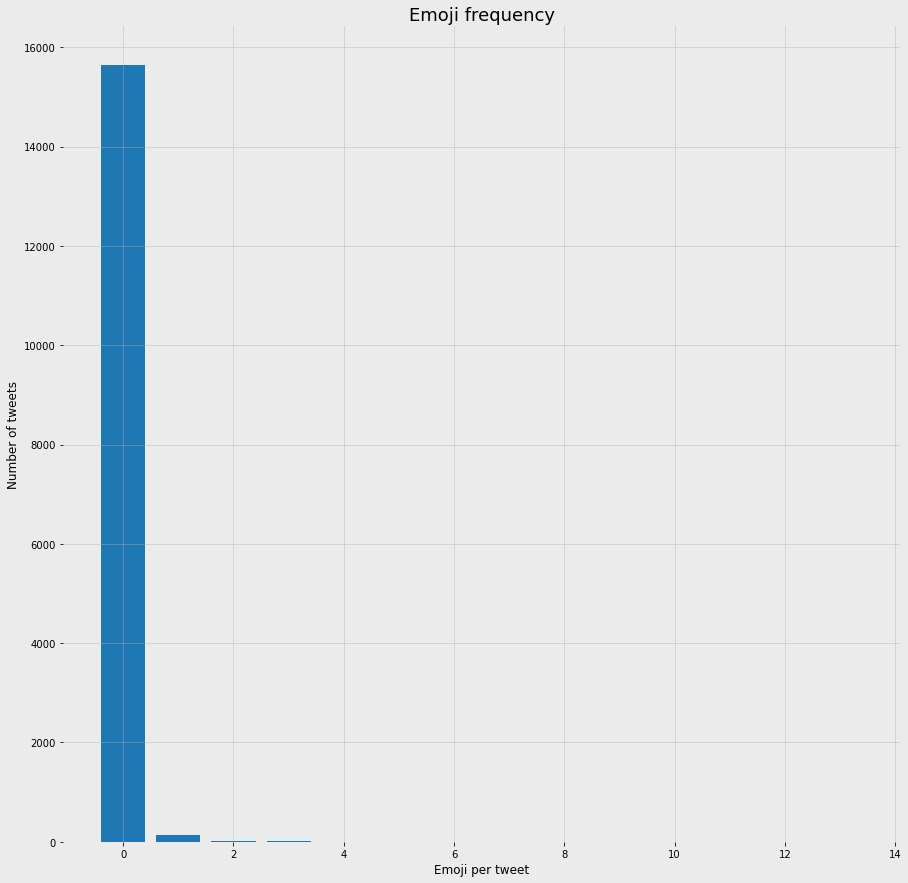

In [69]:
plt.figure(facecolor='#ebebeb', figsize=(15, 15))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [70]:
emoji_summary['top_emoji'][:20]

[('😂', 28),
 ('™', 13),
 ('🤔', 11),
 ('🙄', 11),
 ('🔥', 10),
 ('🤣', 8),
 ('❄️', 7),
 ('🌍', 7),
 ('❤️', 7),
 ('🌎', 6),
 ('🇺🇸', 6),
 ('➡️', 6),
 ('😳', 5),
 ('💀', 5),
 ('▶', 5),
 ('☀️', 5),
 ('🙃', 4),
 ('⚡', 4),
 ('😢', 4),
 ('❤', 4)]

In [71]:
emoji_summary['top_emoji_text'][:20]

[('face with tears of joy', 28),
 ('trade mark', 13),
 ('thinking face', 11),
 ('face with rolling eyes', 11),
 ('red heart', 11),
 ('fire', 10),
 ('snowflake', 8),
 ('rolling on the floor laughing', 8),
 ('globe showing Europe-Africa', 7),
 ('right arrow', 7),
 ('globe showing Americas', 6),
 ('flag: United States', 6),
 ('sun', 6),
 ('flushed face', 5),
 ('skull', 5),
 ('play button', 5),
 ('upside-down face', 4),
 ('high voltage', 4),
 ('crying face', 4),
 ('check mark', 4)]

<a id="section-four"></a>
## Data Preprocessing

In [72]:
def hashtag_extract(tweet):
    df = train.copy()
    """
    This function takes in a tweet and extracts the top 15 hashtag(s) using regular expressions
    These hashtags are stored in a seperate dataframe 
    along with a count of how frequenty they occur
    
    Input:
    tweet: original tweets
           
    Output:
    hashtag_df: dataframe containing the top hashtags in the tweets
              datatype: dataframe         
    """
    
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df


In [74]:
# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 1])
anti = hashtag_extract(df['message'][df['sentiment'] == -1])
neutral = hashtag_extract(df['message'][df['sentiment'] == 0])
news = hashtag_extract(df['message'][df['sentiment'] == 2])


In [75]:
pro.head()

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


In [76]:
anti.head()

,hashtag,count
30,MAGA,11
48,climate,10
12,Trump,7
72,climatechange,6
7,OpChemtrails,4


In [77]:
neutral.head()

,hashtag,count
27,climate,16
9,climatechange,11
104,Trump,11
4,ClimateChange,4
70,amreading,4


In [78]:
news.head()

,hashtag,count
0,climate,130
6,environment,44
11,climatechange,42
57,Trump,25
47,news,20


### Text Preprocessing

Removing all the noise in the tweets by replacing or removing:

- URLs
- Usernames
- Hashtags
- Punctuation
- repeating of RTs
- Emojis

After the noise has been remove the following should take place:
- Make all tweets lowercase
- Remove all stop words from tweet
- Stem/ or Lemmatize the words

In [80]:
def clean_text(message):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    message = str(message).lower()
    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    return message

In [81]:
"""
Making a copy of the test data
"""
df_t = test.copy()
df_t.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Applying the clean_text function:

In [82]:
df['message'] = df['message'].apply(lambda x:clean_text(x))
df_t['message'] = df_t['message'].apply(lambda x:clean_text(x))

In [83]:
"Sanity Check"
df.head()

,sentiment,message,tweetid,word_count
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,19
1,1,its not like we lack evidence of anthropogenic...,126103,10
2,2,rt rawstory researchers say we have three year...,698562,19
3,1,todayinmaker wired was a pivotal year in the...,573736,15
4,1,rt soynoviodetodas its and a racist sexist cl...,466954,18


In [84]:
"Sanity Check"
df_t.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos putin got ...,476263
4,rt fakewillmoore female orgasms cause global w...,872928


Up next we shall get rid of stopwords. These are common words that make a sentence intelligible (e.g 'the', 'and', 'to')

In [172]:
#Functions for stopwords removal
def remove_stop_words(x):
    return [y for y in x if y not in stopwords.words('english')]

In [ ]:
conv.py